In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec

### 1. Compound pairs with fold greater than 100000

In [2]:
df_similarity95=pd.read_csv('similarity95_fold.csv')
df_similarity95[(df_similarity95['fold']>=100000)]

,row,columns,similarity,row_content,columns_content,fold
0,TPCN05893,TPCN05890,0.972758,1.500000,0.000009,166666.666667
1,TPCN03536,TPCN03222,0.967391,2.522321,0.000018,140128.944444
2,TPCN05893,TPCN05889,0.982798,1.500000,0.000011,136363.636364
3,TPCN05893,TPCN05888,0.972758,1.500000,0.000011,136363.636364
4,TPCN05891,TPCN04770,0.968041,3.744898,0.000033,113481.757576
5,TPCN05655,TPCN04785,0.954397,2.600000,0.000023,113043.478261
6,TPCN05893,TPCN05885,0.978996,1.500000,0.000014,107142.857143
7,TPCN05893,TPCN05886,0.972758,1.500000,0.000014,107142.857143


### 2. Compounds with similarity greater than 0.95 to paeoniflorin

In [4]:
df_all=pd.read_csv('../0 data preparation/All.csv',usecols=['ID','Part','Family','Specie'])
df_all=df_all.drop_duplicates(subset='ID')
df_all.rename(columns={'ID':'row'},inplace=True)
# Paeoniflorin (TPCN00011)
df_Paeoniflorin=df_similarity95[(df_similarity95['row']=='TPCN00011')|(df_similarity95['columns']=='TPCN00011')]
df_Paeoniflorin.to_csv('Paeoniflorin.csv',index=False)
df_Paeoniflorin.reset_index(drop=True,inplace=True)
df_Paeoniflorin=df_Paeoniflorin.merge(df_all,on='row')
df_Paeoniflorin

,row,columns,similarity,row_content,columns_content,fold,Part,Family,Specie
0,TPCN00698,TPCN00011,0.962810,0.000045,0.183,4066.666667,Barks,Paeoniaceae,Paeonia suffruticosa
1,TPCN00633,TPCN00011,0.957862,0.000078,0.183,2346.153846,Barks,Paeoniaceae,Paeonia suffruticosa
2,TPCN00581,TPCN00011,0.955897,0.000125,0.183,1464.000000,Barks,Paeoniaceae,Paeonia suffruticosa
3,TPCN00571,TPCN00011,0.965803,0.000130,0.183,1407.692308,Roots,Paeoniaceae,Paeonia suffruticosa
4,TPCN00506,TPCN00011,0.965803,0.000187,0.183,978.609626,Roots,Paeoniaceae,Paeonia emodi
5,TPCN00486,TPCN00011,1.000000,0.000220,0.183,831.818182,Roots,Paeoniaceae,Paeonia emodi
6,TPCN00447,TPCN00011,0.963806,0.000275,0.183,665.454545,Barks,Paeoniaceae,Paeonia suffruticosa
7,TPCN00407,TPCN00011,0.965803,0.000340,0.183,538.235294,Roots,Paeoniaceae,Paeonia suffruticosa
8,TPCN00320,TPCN00011,0.991489,0.000540,0.183,338.888889,Roots,Paeoniaceae,Paeonia delavayi
9,TPCN00274,TPCN00011,0.991489,0.000750,0.183,244.000000,Roots,Paeoniaceae,Paeonia lactiflora


In [5]:
df_Paeoniflorin['Specie'].value_counts()

Paeonia suffruticosa    6
Paeonia emodi           3
Paeonia lactiflora      3
Paeonia delavayi        2
Paeonia obovata         1
Name: Specie, dtype: int64

### 3. The content difference of compound pairs with a similarity greater than 95%

In [6]:
index=[1,10,100,1000,10000,100000,1000000]
data=[]
for i in range(len(index)-1):
    molecules=df_similarity95[(df_similarity95['fold']>=index[i])&(df_similarity95['fold']<index[i+1])]
    fold='['+str(index[i])+','+str(index[i+1])+')'
    data.append((fold,len(molecules)))
data=pd.DataFrame(data,columns=['fold','counts'])
data

,fold,counts
0,"[1,10)",32236
1,"[10,100)",14339
2,"[100,1000)",3726
3,"[1000,10000)",570
4,"[10000,100000)",99
5,"[100000,1000000)",8


In [7]:
df_similarity95[(df_similarity95['fold']>=100000)&(df_similarity95['fold']<1000000)]

,row,columns,similarity,row_content,columns_content,fold
0,TPCN05893,TPCN05890,0.972758,1.500000,0.000009,166666.666667
1,TPCN03536,TPCN03222,0.967391,2.522321,0.000018,140128.944444
2,TPCN05893,TPCN05889,0.982798,1.500000,0.000011,136363.636364
3,TPCN05893,TPCN05888,0.972758,1.500000,0.000011,136363.636364
4,TPCN05891,TPCN04770,0.968041,3.744898,0.000033,113481.757576
5,TPCN05655,TPCN04785,0.954397,2.600000,0.000023,113043.478261
6,TPCN05893,TPCN05885,0.978996,1.500000,0.000014,107142.857143
7,TPCN05893,TPCN05886,0.972758,1.500000,0.000014,107142.857143


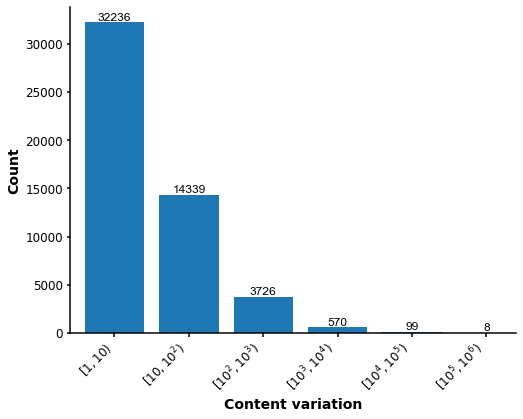

In [8]:
### Barplot
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
fold = ['$[1,10)$', '$[10,10^{2})$', '$[10^{2},10^{3})$', '$[10^{3},10^{4})$', '$[10^{4},10^{5})$', '$[10^{5},10^{6})$']
counts = [32236, 14339, 3726, 570, 99, 8]
bars = plt.bar(fold, counts)
plt.xlabel('Content variation', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.tick_params(width=1.5)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.6, len(fold) - 0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=12)
plt.savefig('bar.tif', dpi=600, bbox_inches='tight')
plt.show()

### 4. Similarity distribution of compound pairs with a similarity greater than 95%

In [9]:
similarity_index=[0.95,0.96,0.97,0.98,0.99,1]
data_similarity=[]
for i in range(len(similarity_index)-1):
    similarity_left=similarity_index[i]
    similarity_right=similarity_index[i+1]
    molecules=df_similarity95[(df_similarity95['similarity']>=similarity_left)&(df_similarity95['similarity']<similarity_right)]
    similarity='['+str(similarity_left)+','+str(similarity_right)+')'
    data_similarity.append((similarity,len(molecules)))
data_similarity=pd.DataFrame(data_similarity,columns=['Similarity','Counts'])
data_similarity

,Similarity,Counts
0,"[0.95,0.96)",15105
1,"[0.96,0.97)",12725
2,"[0.97,0.98)",9500
3,"[0.98,0.99)",7136
4,"[0.99,1)",4127
